In [2475]:
import warnings 
warnings.simplefilter("ignore")

In [2476]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

## Reading and Understanding the Data

In [2477]:
df = pd.read_csv("UGDevSeparateday.csv")

In [2478]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Insight: The dataset has 7 numerical variables, one date column and 7 categorical variables that have been encoded to 
numerics. There are no missing values in the dataset. 

To understand the spread of each of these variables, lets describe them. 

In [2480]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


It appears that the data is not heavily skewed in any of the given features and there are no exceptional outliers to be removed. However, we check our numeric columns again to spot any outliers that could impact our regression model.

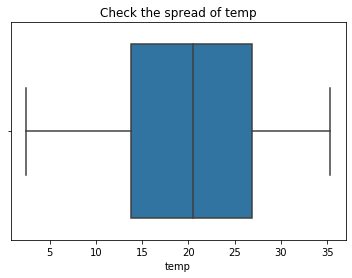

**********************************************


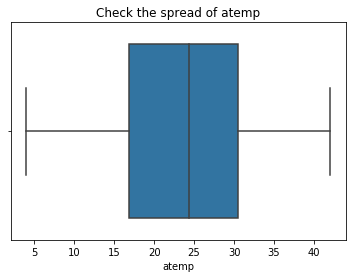

**********************************************


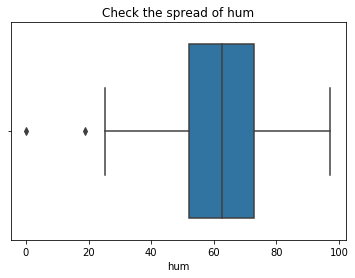

**********************************************


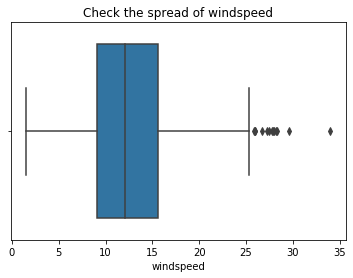

**********************************************


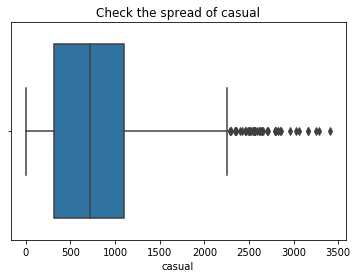

**********************************************


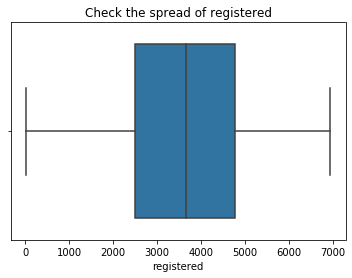

**********************************************


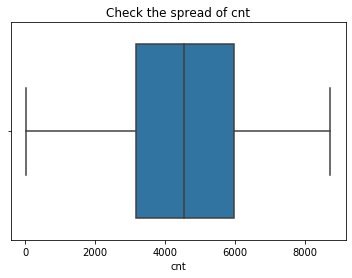

**********************************************


In [2481]:
numeric = ["temp","atemp","hum","windspeed","casual","registered","cnt"]

for i in numeric:
    sns.boxplot(df[i])
    plt.title("Check the spread of "+i)
    plt.show()
    print("**********************************************")

Insight: Humidity and windspeed have outliers to be taken care of. We will remove them from our dataset so they dont impact our linear best fit line

In [2482]:
df = df.loc[(df.hum >20) & (df.windspeed < 30), :]

In [2483]:
df.shape

(728, 16)

We dropped 2 rows 

We will also drop instant and date column. Instant is just a serial number which will not help us in predicting the demand. 
Date column is used to derive many other variables like season, weekday etc. So we will drop date to reduce the multicollinearity between these columns. 

In [2484]:
df = df.drop(["instant","dteday"], axis = 1 )

## Handling categorical variables and Visualising them

In [2485]:
df.season = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df.weekday = df.weekday.map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday" })
df.mnth = df.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
df.weathersit = df.weathersit.map({1:"Clear", 2:"Mist", 3:"Light snow", 4:"Heavy rain"})
df.yr = df.yr.map({0: "2018" , 1: "2019" })
df.holiday = df.holiday.map({1: "yes", 0:"no"})
df.workingday = df.workingday.map({1: "working day", 0:"non-working day"})

In [2486]:
df_categorical = df.select_dtypes(include = "object")

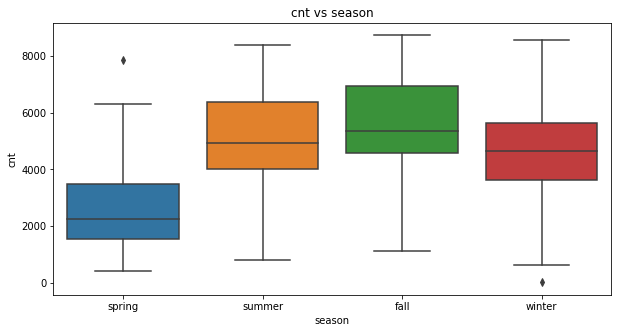

********************************************************************


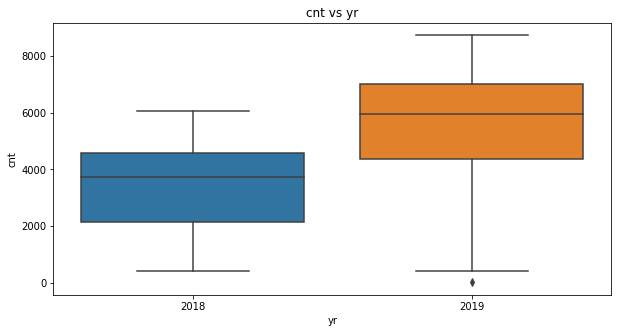

********************************************************************


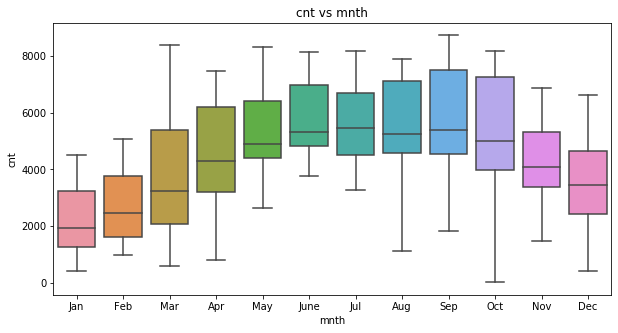

********************************************************************


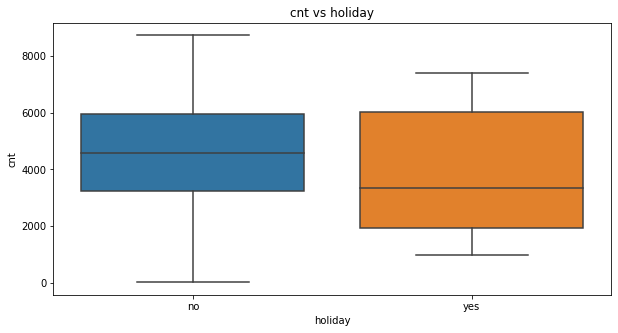

********************************************************************


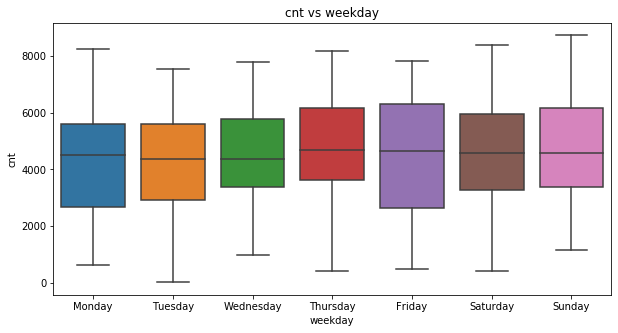

********************************************************************


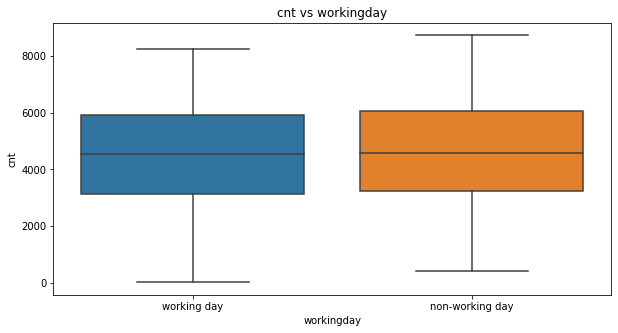

********************************************************************


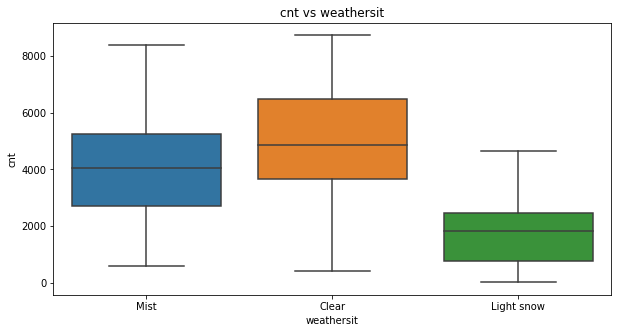

********************************************************************


In [2487]:
for i in df_categorical.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x= i, y="cnt", data = df)
    plt.title("cnt vs "+i)
    plt.show()
    print("********************************************************************")

From the above graphs, we can observe that 
1. Median demand for rental bikes is highest during fall and lowest during spring. Winter has a better demand than spring, which does not seem intuitive. This may be because of the mapping of the months to seasons in the data. But we will not change the raw data given for this assignment.
2. Median demand for rental bikes is sginificantly high during 2019 compared to 2018 
3. Median demand for rental bikes is higher during the months of may - october. Jan- apr have low rentals. 
4. Median demand for rental bikes is higher when there is no holiday. Bikes are used more during workdays 
5. There is no difference in median demand of bikes when compared with all days.
6. There is no difference in median demand of bikes on a working or a non-working day 
7. Median demand for bikes is the highest during clear weather and lowest when there is light snow. 

## Visualising numerical data 

In [2488]:
df_numerical = df.select_dtypes(include = ["float64","int64"])
df_numerical.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

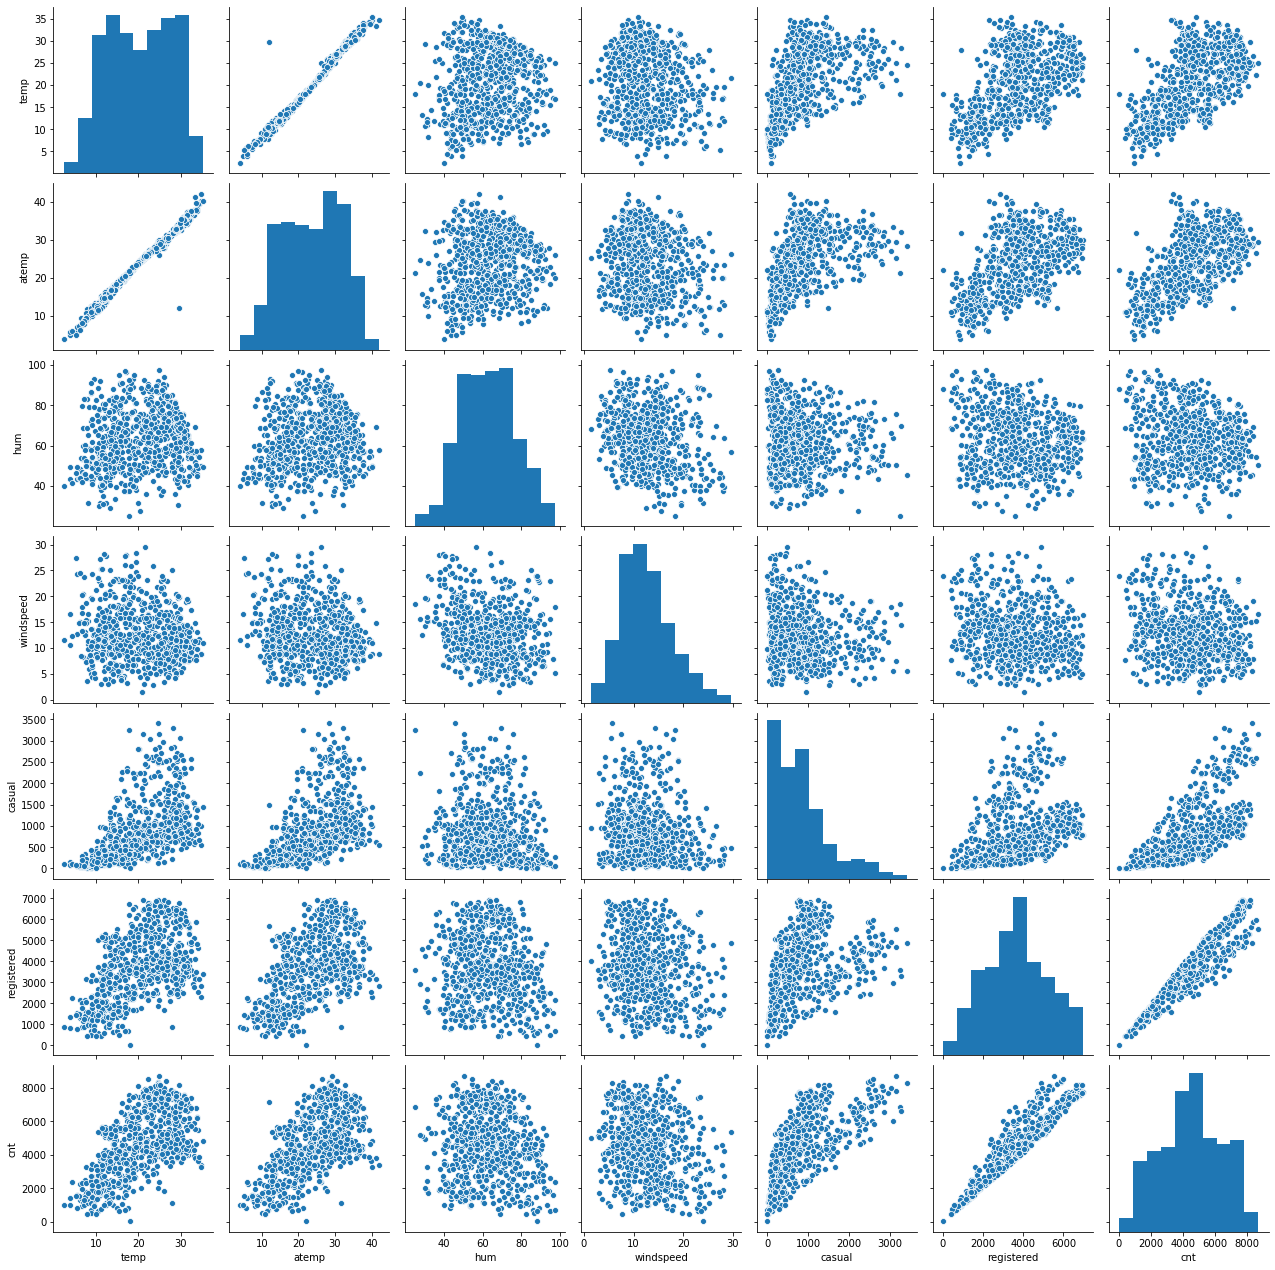

In [2489]:
sns.pairplot(df_numerical)
plt.show()

Insights:
1. Temp and atemp are strongly positively correlated. We need to remove any one of them 
2. Cnt has a strong linear relationship with registered column and casual column. 
3. Windspeed and humidity are negatively correlated with cnt 
4. Temp and cnt have a strong linear relationship. 

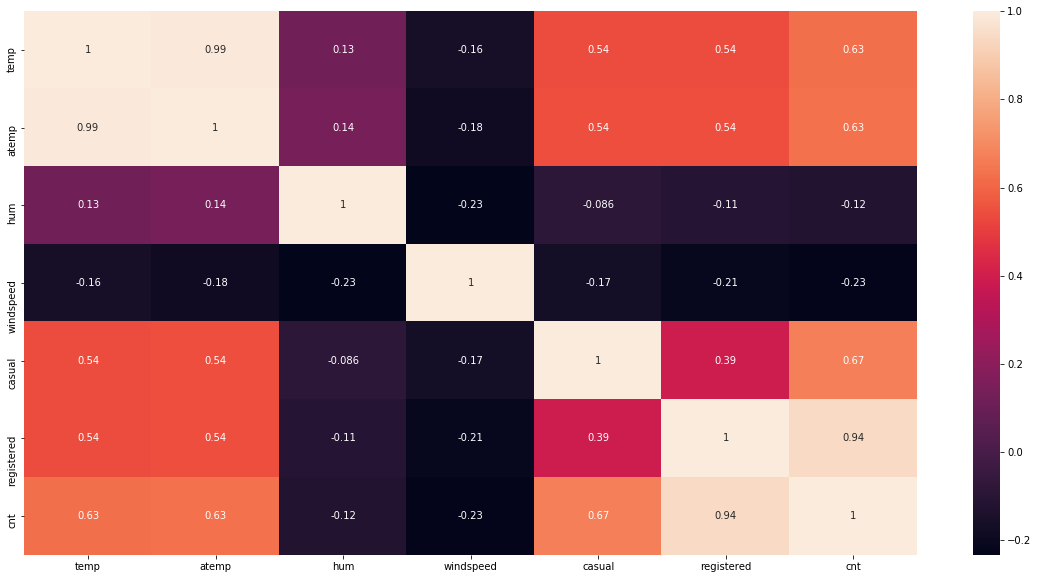

In [2490]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_numerical.corr(),annot = True)
plt.show()

Insight: 

Registered has a correlation of 0.94 with cnt. As this variable was used to derive our target variable, we will drop this for our model building. We will do the same with casual column for the same reason. 

Temp and atemp have a correlation of 0.99. So we will only keep one for our model building. 

Count of bikes is negatively related with windspeed and humidity.



## Dropping variables that are not required for model building 

In [2491]:
df = df.drop(["atemp", "casual","registered"], axis = 1)


## Converting categorical variable to dummy variables for model building

In [2492]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [2493]:
dummies = pd.get_dummies(df_categorical, drop_first=True)

In [2494]:
dummies

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_June,...,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_working day,weathersit_Light snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
726,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
727,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [2495]:
# merge dummies with main df 
df = pd.concat([df, dummies] , axis = 1)

In [2496]:
# drop all categorical columns 

df = df.drop(df_categorical,axis = 1)

In [2497]:
df.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_working day,weathersit_Light snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Final Correlation matrix and insights 

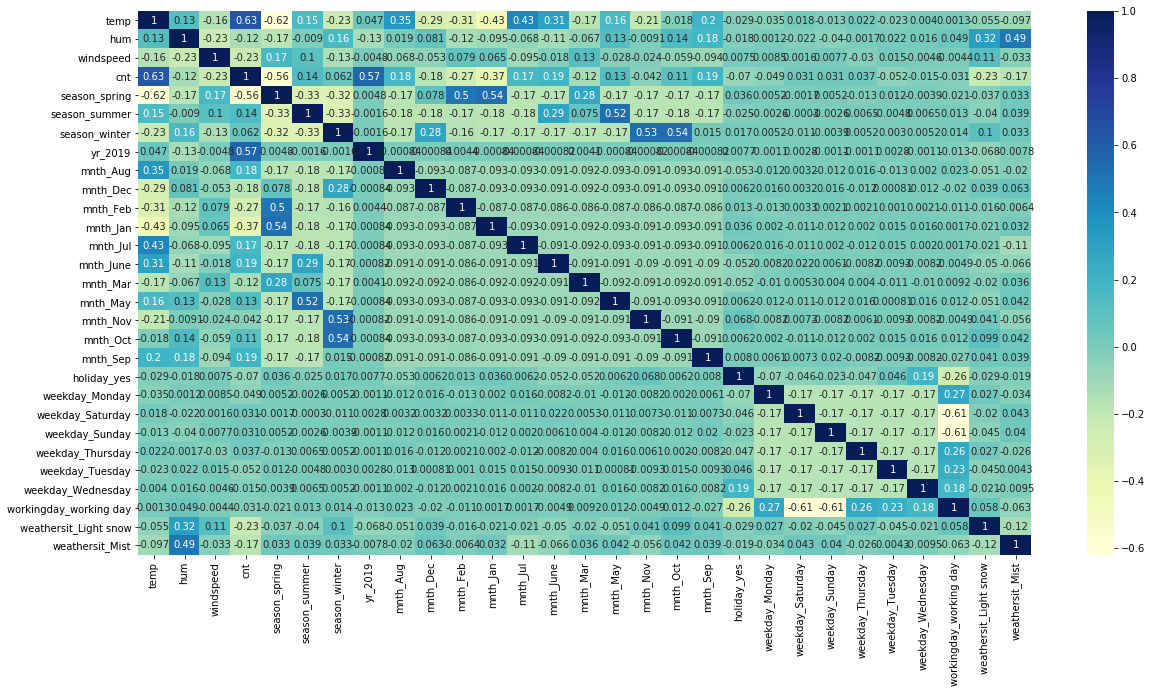

In [2498]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True, cmap = "YlGnBu")
plt.show()

#### correlation between target variable and other features 
1. cnt and yr 2019 (strong positive )
2. cnt and temp (strong positive )
3. cnt and spring (strong negative )
4. cnt and light snow/mist (moderate negative )

#### Intercorrelation (multicollinearity) 
1. mist/light snow and hum (highly positive)
2. nov, oct and winter (highly positive)
3. feb, jan and spring (highly positive)
4. may and summer (highly positive)
4. saturday , sunday and working day (highly negative)

There is significant multicollinearity between variables. So we need to take this into account while building the model. 

## Splitting the model into train and test sets

In [2499]:
df.shape

(728, 29)

In [2500]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 120)

In [2501]:
df_train.shape

(509, 29)

In [2502]:
df_test.shape

(219, 29)

## Reshaping the columns 

In [2503]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2504]:
scaler = MinMaxScaler()

In [2505]:
df_train.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'holiday_yes', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday_working day',
       'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [2506]:
var = ['temp', 'hum', 'windspeed', 'cnt']

In [2507]:
df_train[var] = scaler.fit_transform(df_train[var])

In [2508]:
df_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_working day,weathersit_Light snow,weathersit_Mist
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.547424,0.513319,0.401262,0.519000,0.239686,0.247544,0.241650,0.481336,0.088409,0.082515,...,0.031434,0.155206,0.145383,0.151277,0.129666,0.121807,0.163065,0.677800,0.031434,0.339882
std,0.229548,0.202260,0.188466,0.228739,0.427312,0.432010,0.428505,0.500143,0.284168,0.275418,...,0.174660,0.362457,0.352833,0.358671,0.336266,0.327385,0.369788,0.467779,0.174660,0.474135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354130,0.357967,0.262602,0.357319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.553679,0.512561,0.378326,0.525841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.743521,0.653708,0.502936,0.675495,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model_ 1 using RFE feature selection method and MinMax scaling

In [2509]:
from sklearn.linear_model import LinearRegression

In [2510]:
lr = LinearRegression()

In [2511]:
y_train = df_train.pop("cnt")
X_train = df_train

In [2512]:
model = lr.fit(X_train, y_train)

In [2513]:
from sklearn.feature_selection import RFE

In [2514]:
# we will use rfe to coarse tune and select top 18 features out of 29 features, which is half of the features. 
rfe = RFE(lr, 18)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_June', False, 2),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 6),
 ('workingday_working day', False, 4),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [2515]:
col = X_train.columns[rfe.support_]
col 

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'holiday_yes', 'weekday_Monday', 'weekday_Tuesday',
       'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [2516]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Oct',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Wednesday', 'workingday_working day'],
      dtype='object')

In [2517]:

X_train_rfe = X_train[col]

In [2518]:
import statsmodels.api as sm

In [2519]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [2520]:
smlr = sm.OLS(y_train,X_train_rfe).fit()

In [2521]:
smlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.31e-179
Time:                        16:57:14   Log-Likelihood:                 488.90
No. Observations:                 509   AIC:                            -939.8
Df Residuals:                     490   BIC:                            -859.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3591      0.030     11.836      0.000       0.300       0.419
temp                      0.4326      0.036     12.118      0.000       0.363       0.503
hum                      -0.1637      0.030     -5.396      0.000      -0.223      -0.104
windspeed                -0.1389      0.024     -5.685      0.000      -0.187      -0.091
season_spring            -0.1233      0.018     -6.868      0.000      -0.159      -0.088
season_winter             0.0847      0.015      5.509      0.000       0.054       0.115
yr_2019                   0.2306      0.009     26.943      0.000       0.214       0.247
mnth_Dec                 -0.0440      0.018     -2.395      0.017      -0.080      -0.008
mnth_Jan                 -0.0235      0.020     -1.159      0.247      -0.063       0.016
mnth_Jul                 -0.0622      0.018     -3.507      0.000      -0.097      -0.027
mnth_Mar                  0.0388      0.018      2.144      0.033       0.003       0.074
mnth_May                  0.0366      0.017      2.145      0.032       0.003       0.070
mnth_Nov                 -0.0650      0.020     -3.307      0.001      -0.104      -0.026
mnth_Sep                  0.0721      0.017      4.344      0.000       0.039       0.105
holiday_yes              -0.0846      0.024     -3.476      0.001      -0.132      -0.037
weekday_Monday           -0.0288      0.012     -2.440      0.015      -0.052      -0.006
weekday_Tuesday          -0.0311      0.013     -2.365      0.018      -0.057      -0.005
weathersit_Light snow    -0.2041      0.029     -7.121      0.000      -0.260      -0.148
weathersit_Mist          -0.0492      0.011     -4.296      0.000      -0.072      -0.027
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.145
Skew:                          -0.834   Prob(JB):                     8.36e-37
Kurtosis:                       5.248   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R2 of the model with 18 variables is 0.836 and adjusted R2 is 0.83. This means despite including so many features 
in the model, adj R2 has not decreased significantly, indicating that all variables add significant predicting power to the model despite the penalty. 

The P(F statistic) is very low, indicating that the overall model is significant. 

Jan has a P value of greater than 0.05.
Apart from Jan, none of the features have a non-significant p value at the significance level of 0.05. Which is a great sign. We will look at the VIF score of these features to see if there is any multicollinearity. 

In [2522]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2523]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.61
1,temp,3.83
4,season_spring,3.36
5,season_winter,2.48
2,hum,2.15
8,mnth_Jan,2.03
12,mnth_Nov,1.75
18,weathersit_Mist,1.68
7,mnth_Dec,1.46
17,weathersit_Light snow,1.43


VIF of const is 52.61. Now, we cannot remove constant from our dataset as it is what gives an intercept to our linear best fit line. Also, as a constant is not our model feature per se, it doesnt matter if it is collinear with other features. Our constant is a culmination of all our base variables. Our constant value also has a significant P value. So we will not drop the constant.

All the other features have a VIF below 5. We will remove Jan as it has a high P value and see how the model paramaters change. 


In [2524]:
X_train_rfe = X_train_rfe.drop("mnth_Jan", 1)
smlr = sm.OLS(y_train,X_train_rfe).fit()
smlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.41e-180
Time:                        16:57:14   Log-Likelihood:                 488.21
No. Observations:                 509   AIC:                            -940.4
Df Residuals:                     491   BIC:                            -864.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3498      0.029     11.956      0.000       0.292       0.407
temp                      0.4458      0.034     13.167      0.000       0.379       0.512
hum                      -0.1657      0.030     -5.466      0.000      -0.225      -0.106
windspeed                -0.1372      0.024     -5.622      0.000      -0.185      -0.089
season_spring            -0.1295      0.017     -7.557      0.000      -0.163      -0.096
season_winter             0.0859      0.015      5.599      0.000       0.056       0.116
yr_2019                   0.2298      0.009     26.926      0.000       0.213       0.247
mnth_Dec                 -0.0370      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jul                 -0.0638      0.018     -3.607      0.000      -0.099      -0.029
mnth_Mar                  0.0467      0.017      2.785      0.006       0.014       0.080
mnth_May                  0.0379      0.017      2.221      0.027       0.004       0.071
mnth_Nov                 -0.0614      0.019     -3.163      0.002      -0.100      -0.023
mnth_Sep                  0.0728      0.017      4.393      0.000       0.040       0.105
holiday_yes              -0.0852      0.024     -3.498      0.001      -0.133      -0.037
weekday_Monday           -0.0286      0.012     -2.417      0.016      -0.052      -0.005
weekday_Tuesday          -0.0304      0.013     -2.313      0.021      -0.056      -0.005
weathersit_Light snow    -0.2027      0.029     -7.077      0.000      -0.259      -0.146
weathersit_Mist          -0.0489      0.011     -4.266      0.000      -0.071      -0.026
==============================================================================
Omnibus:                       75.710   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.931
Skew:                          -0.822   Prob(JB):                     5.08e-35
Kurtosis:                       5.179   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2525]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.87
1,temp,3.44
4,season_spring,3.06
5,season_winter,2.46
2,hum,2.14
11,mnth_Nov,1.70
17,weathersit_Mist,1.68
16,weathersit_Light snow,1.43
8,mnth_Jul,1.41
7,mnth_Dec,1.30


As all variables have a P value of less than 0.05 and a VIF of less than 5, and our model's adj R2 has dropped we can make this our final model_1 with 17 variables. 

## Residual analysis of final_model 1 

In [2526]:
y_train_pred = smlr.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

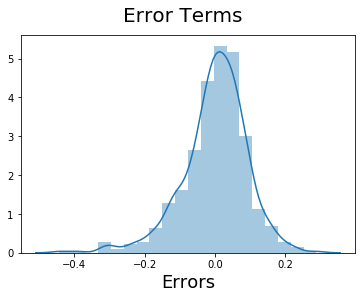

In [2527]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Insight: the error terms have a roughly normally distributed shape with mean at peak 0. Hence, our model follows the assumption that error terms have normal distribution. 

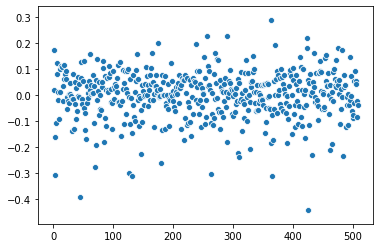

In [2528]:
res = (y_train - y_train_pred)
c = [i for i in range(1,510,1)]
sns.scatterplot(c,res)
plt.show()

As the error terms are randomly distributed around mean 0 and they do not follow a pattern, we can say that our residuals are independent from each other. 

## Predicting on test set using our model 

In [2529]:
df_test[var] = scaler.transform(df_test[var])

In [2530]:
y_test = df_test.pop("cnt")
X_test = df_test
X_test = X_test[col]

In [2531]:
X_test = X_test.drop("mnth_Jan", 1)

In [2532]:
X_test = sm.add_constant(X_test)
y_test_pred = smlr.predict(X_test)


## Model Evaluation - final_model_1

In [2533]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2534]:
r2_score(y_test, y_test_pred)

0.8589211530201677

In [2535]:
r2_score(y_train, y_train_pred)

0.8353369500916692

R2 score has increased by 2% while making predictions on the test data. This shows that our model has generalised well 
on our test data. 

In [2536]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.08233257380888136

Our rmse is very low, close to 0. This is a great sign indicating that our model has captured most of the variance in data. 

In [2537]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

0.09272789291466156

## Model building 2 - Using standard scaling and RFE

In [2538]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 120)

In [2539]:
scaler = StandardScaler()

In [2540]:
df_train[var] = scaler.fit_transform(df_train[var])

In [2541]:
y_train_new = df_train.pop("cnt")
X_train_new = df_train

In [2542]:
model_2 = lr.fit(X_train_new, y_train_new)


In [2543]:
# we will choose half of the features from our dataset to include in our model. 
rfe = RFE(lr, 18)
rfe = rfe.fit(X_train_new, y_train_new)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_June', False, 2),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 6),
 ('workingday_working day', False, 4),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [2544]:
col = X_train_new.columns[rfe.support_]
col 
X_train_rfe_2 = X_train_new[col]

In [2545]:
X_train_rfe_2 = sm.add_constant(X_train_rfe_2)

In [2546]:
model_new = sm.OLS(y_train_new, X_train_rfe_2).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.31e-179
Time:                        16:57:15   Log-Likelihood:                -262.46
No. Observations:                 509   AIC:                             562.9
Df Residuals:                     490   BIC:                             643.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2749      0.051     -5.434      0.000      -0.374      -0.175
temp                      0.4342      0.036     12.118      0.000       0.364       0.505
hum                      -0.1448      0.027     -5.396      0.000      -0.198      -0.092
windspeed                -0.1145      0.020     -5.685      0.000      -0.154      -0.075
season_spring            -0.5395      0.079     -6.868      0.000      -0.694      -0.385
season_winter             0.3706      0.067      5.509      0.000       0.238       0.503
yr_2019                   1.0090      0.037     26.943      0.000       0.935       1.083
mnth_Dec                 -0.1925      0.080     -2.395      0.017      -0.350      -0.035
mnth_Jan                 -0.1026      0.089     -1.159      0.247      -0.277       0.071
mnth_Jul                 -0.2724      0.078     -3.507      0.000      -0.425      -0.120
mnth_Mar                  0.1698      0.079      2.144      0.033       0.014       0.325
mnth_May                  0.1603      0.075      2.145      0.032       0.013       0.307
mnth_Nov                 -0.2846      0.086     -3.307      0.001      -0.454      -0.116
mnth_Sep                  0.3154      0.073      4.344      0.000       0.173       0.458
holiday_yes              -0.3702      0.107     -3.476      0.001      -0.579      -0.161
weekday_Monday           -0.1262      0.052     -2.440      0.015      -0.228      -0.025
weekday_Tuesday          -0.1360      0.058     -2.365      0.018      -0.249      -0.023
weathersit_Light snow    -0.8933      0.125     -7.121      0.000      -1.140      -0.647
weathersit_Mist          -0.2153      0.050     -4.296      0.000      -0.314      -0.117
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.145
Skew:                          -0.834   Prob(JB):                     8.36e-37
Kurtosis:                       5.248   Cond. No.                         9.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All the features have a significant p value with an alpha of 0.05, except Jan. Let us see if any of them have a high VIF. The adj R2 is the same as the model_1. 

In [2547]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.64
1,temp,3.83
4,season_spring,3.36
5,season_winter,2.48
2,hum,2.15
8,mnth_Jan,2.03
12,mnth_Nov,1.75
18,weathersit_Mist,1.68
7,mnth_Dec,1.46
17,weathersit_Light snow,1.43


All features have a VIF below 5. So thats good. We cant remove constant from our model as we need an intercept, and because we dont care if its multicollinear with other variables. So we will proceed with removing Jan from our model.

In [2548]:
X_train_rfe_2 = X_train_rfe_2.drop("mnth_Jan", 1)
model_new = sm.OLS(y_train_new,X_train_rfe_2).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.41e-180
Time:                        16:57:16   Log-Likelihood:                -263.16
No. Observations:                 509   AIC:                             562.3
Df Residuals:                     491   BIC:                             638.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2857      0.050     -5.745      0.000      -0.383      -0.188
temp                      0.4474      0.034     13.167      0.000       0.381       0.514
hum                      -0.1465      0.027     -5.466      0.000      -0.199      -0.094
windspeed                -0.1130      0.020     -5.622      0.000      -0.153      -0.074
season_spring            -0.5667      0.075     -7.557      0.000      -0.714      -0.419
season_winter             0.3759      0.067      5.599      0.000       0.244       0.508
yr_2019                   1.0056      0.037     26.926      0.000       0.932       1.079
mnth_Dec                 -0.1619      0.076     -2.131      0.034      -0.311      -0.013
mnth_Jul                 -0.2794      0.077     -3.607      0.000      -0.432      -0.127
mnth_Mar                  0.2044      0.073      2.785      0.006       0.060       0.349
mnth_May                  0.1658      0.075      2.221      0.027       0.019       0.312
mnth_Nov                 -0.2689      0.085     -3.163      0.002      -0.436      -0.102
mnth_Sep                  0.3188      0.073      4.393      0.000       0.176       0.461
holiday_yes              -0.3726      0.107     -3.498      0.001      -0.582      -0.163
weekday_Monday           -0.1250      0.052     -2.417      0.016      -0.227      -0.023
weekday_Tuesday          -0.1329      0.057     -2.313      0.021      -0.246      -0.020
weathersit_Light snow    -0.8873      0.125     -7.077      0.000      -1.134      -0.641
weathersit_Mist          -0.2138      0.050     -4.266      0.000      -0.312      -0.115
==============================================================================
Omnibus:                       75.710   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.931
Skew:                          -0.822   Prob(JB):                     5.08e-35
Kurtosis:                       5.179   Cond. No.                         9.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can go ahead with this as our final model with 17 parameters, as it meets all the criterias. 

## Residual analysis

In [2549]:
y_train_pred_2 = model_new.predict(X_train_rfe_2)

Text(0.5, 0, 'Errors')

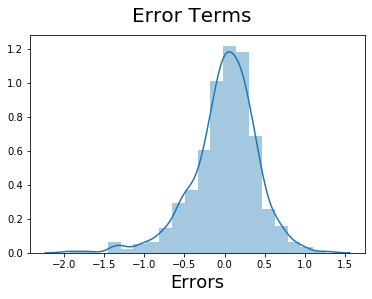

In [2550]:
fig = plt.figure()
sns.distplot((y_train_new - y_train_pred_2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Insight: the error terms have been normally distributed at mean 0. Hence, our model stands on this assumption.

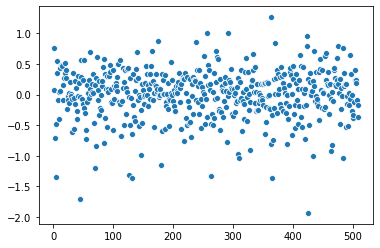

In [2551]:
res = (y_train_new - y_train_pred_2)
c = [i for i in range(1,510,1)]
sns.scatterplot(c,res)
plt.show()

As the error terms are randomly distributed around mean 0 and they do not follow a pattern, we can say that our model is explaining the target well.  

## Predicting on test set using our model 

In [2552]:
df_test[var] = scaler.transform(df_test[var])

In [2553]:
y_test_new = df_test.pop("cnt")
X_test_new = df_test

In [2554]:
X_test_new = X_test_new[col]

In [2555]:
X_test_new = X_test_new.drop("mnth_Jan",1)

In [2556]:
X_test_new = sm.add_constant(X_test_new)

In [2557]:
y_test_pred_2 = model_new.predict(X_test_new)

## Model Evaluation of model_2

In [2558]:
r2_score(y_test_new, y_test_pred_2)

0.8589211530201677

In [2559]:
r2_score(y_train_new ,y_train_pred_2)

0.8353369500916691

R2 has increased by 2% while making predictions on test set. Hence our model can be claimed as a generalisable model.

In [2560]:
np.sqrt(mean_squared_error(y_test_new,y_test_pred_2))

0.36029594844481944

In [2561]:
np.sqrt(mean_squared_error(y_train_new,y_train_pred_2))

0.4057869513776052

##  RFE selected feature models and comparision

We saw two models that used different scaling methods, but had the same R2 on the test set - 85.86%. 

The RMSE of model with minmax scaling is 0.08 which is much lower than the RMSE of model with standard scaling, 0.36. 
However, it is to be noted that both scaling methods result in different Y values. So we cant compare their rmse. 

Both models have a similar adj R2 of 0.830 too. So we could choose any one of them as our final model. Before that, we will have a look at another model, using the forward technique. 

## Forward selection method - Model 3 

In [2591]:
X_train.describe()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_working day,weathersit_Light snow,weathersit_Mist
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.547424,0.513319,0.401262,0.239686,0.247544,0.241650,0.481336,0.088409,0.082515,0.062868,...,0.031434,0.155206,0.145383,0.151277,0.129666,0.121807,0.163065,0.677800,0.031434,0.339882
std,0.229548,0.202260,0.188466,0.427312,0.432010,0.428505,0.500143,0.284168,0.275418,0.242965,...,0.174660,0.362457,0.352833,0.358671,0.336266,0.327385,0.369788,0.467779,0.174660,0.474135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354130,0.357967,0.262602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.553679,0.512561,0.378326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.743521,0.653708,0.502936,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2563]:
# we will add temp to our model as it highest correlation with our target variable
X_train_forward = pd.DataFrame(X_train.temp)
X_train_forward = sm.add_constant(X_train_forward)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     332.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.92e-57
Time:                        16:57:16   Log-Likelihood:                 157.35
No. Observations:                 509   AIC:                            -310.7
Df Residuals:                     507   BIC:                            -302.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1758      0.020      8.612      0.000       0.136       0.216
temp           0.6269      0.034     18.224      0.000       0.559       0.694
==============================================================================
Omnibus:                       11.421   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.805
Skew:                           0.224   Prob(JB):                       0.0122
Kurtosis:                       2.536   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2564]:
vif = pd.DataFrame()
vif['Features'] = X_train_forward.columns
vif['VIF'] = [variance_inflation_factor(X_train_forward.values, i) for i in range(X_train_forward.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.7
1,temp,1.0


The model uses only temperature to explain the demand of the bikes. The R2 is 0.396 and adj R2 is 0.395. 
This proves that temperature only can affect demand by 62%. Hence, this business is very weather sensitive. Next we 
will add year_2019. 

In [2565]:
# add yr variable as it has th enext highest correlaltion with our target 
X_train_forward = pd.concat([X_train_forward, X_train.yr_2019], axis = 1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     508.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.32e-122
Time:                        16:57:16   Log-Likelihood:                 309.70
No. Observations:                 509   AIC:                            -613.4
Df Residuals:                     506   BIC:                            -600.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0762      0.016      4.788      0.000       0.045       0.108
temp           0.5987      0.026     23.421      0.000       0.549       0.649
yr_2019        0.2389      0.012     20.366      0.000       0.216       0.262
==============================================================================
Omnibus:                       31.182   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.018
Skew:                          -0.525   Prob(JB):                     2.04e-09
Kurtosis:                       3.886   Cond. No.                         6.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2566]:
vif = pd.DataFrame()
vif['Features'] = X_train_forward.columns
vif['VIF'] = [variance_inflation_factor(X_train_forward.values, i) for i in range(X_train_forward.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.4
1,temp,1.0
2,yr_2019,1.0


Our model's R2 has gone up significantly after adding year as a variable. We will now add humidity to our model. 

In [2567]:
X_train_forward = pd.concat([X_train_forward, X_train.hum], axis = 1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     372.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.60e-127
Time:                        16:57:16   Log-Likelihood:                 326.12
No. Observations:                 509   AIC:                            -644.2
Df Residuals:                     505   BIC:                            -627.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1582      0.021      7.561      0.000       0.117       0.199
temp           0.6099      0.025     24.542      0.000       0.561       0.659
yr_2019        0.2313      0.011     20.202      0.000       0.209       0.254
hum           -0.1644      0.028     -5.801      0.000      -0.220      -0.109
==============================================================================
Omnibus:                       17.902   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.805
Skew:                          -0.404   Prob(JB):                     5.00e-05
Kurtosis:                       3.531   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2568]:
vif = pd.DataFrame()
vif['Features'] = X_train_forward.columns
vif['VIF'] = [variance_inflation_factor(X_train_forward.values, i) for i in range(X_train_forward.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.60
2,yr_2019,1.02
3,hum,1.02
1,temp,1.01


Humidity is negatively related to our demand. This improves our models Adj R2 from 66% to 68%. Next, we will add 
windspeed.

In [2569]:
X_train_forward = pd.concat([X_train_forward, X_train.windspeed], axis = 1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     320.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.71e-137
Time:                        16:57:17   Log-Likelihood:                 351.20
No. Observations:                 509   AIC:                            -692.4
Df Residuals:                     504   BIC:                            -671.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2777      0.026     10.720      0.000       0.227       0.329
temp           0.5890      0.024     24.688      0.000       0.542       0.636
yr_2019        0.2302      0.011     21.097      0.000       0.209       0.252
hum           -0.2065      0.028     -7.475      0.000      -0.261      -0.152
windspeed     -0.2142      0.030     -7.225      0.000      -0.272      -0.156
==============================================================================
Omnibus:                       21.237   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.590
Skew:                          -0.456   Prob(JB):                     7.54e-06
Kurtosis:                       3.529   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Windspeed is negatively related to our demand. This improves our models Adj R2 from 68% to 71%. All our variables have a significant value and very low VIFs.

In [2570]:
vif = pd.DataFrame()
vif['Features'] = X_train_forward.columns
vif['VIF'] = [variance_inflation_factor(X_train_forward.values, i) for i in range(X_train_forward.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.97
3,hum,1.07
4,windspeed,1.07
1,temp,1.02
2,yr_2019,1.02


In [2571]:
X_train_forward = pd.concat([X_train_forward, X_train["weathersit_Light snow"]], axis = 1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     271.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.16e-140
Time:                        16:57:17   Log-Likelihood:                 361.80
No. Observations:                 509   AIC:                            -711.6
Df Residuals:                     503   BIC:                            -686.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2525      0.026      9.718      0.000       0.201       0.304
temp                      0.5815      0.023     24.801      0.000       0.535       0.628
yr_2019                   0.2304      0.011     21.545      0.000       0.209       0.251
hum                      -0.1588      0.029     -5.480      0.000      -0.216      -0.102
windspeed                -0.1905      0.030     -6.454      0.000      -0.248      -0.133
weathersit_Light snow    -0.1513      0.033     -4.625      0.000      -0.216      -0.087
==============================================================================
Omnibus:                       16.333   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.347
Skew:                          -0.402   Prob(JB):                     0.000171
Kurtosis:                       3.413   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our models has a better adj r2 now, and light snow is a significant predictor of demand so we will keep it in our model. Next we will add seasons to our model.

In [2572]:
X_train_forward = pd.concat([X_train_forward, X_train.season_spring], axis = 1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     316.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.10e-167
Time:                        16:57:17   Log-Likelihood:                 427.63
No. Observations:                 509   AIC:                            -841.3
Df Residuals:                     502   BIC:                            -811.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4038      0.026     15.523      0.000       0.353       0.455
temp                      0.3817      0.026     14.486      0.000       0.330       0.434
yr_2019                   0.2288      0.009     24.318      0.000       0.210       0.247
hum                      -0.1853      0.026     -7.243      0.000      -0.236      -0.135
windspeed                -0.1536      0.026     -5.878      0.000      -0.205      -0.102
weathersit_Light snow    -0.1711      0.029     -5.937      0.000      -0.228      -0.115
season_spring            -0.1743      0.014    -12.173      0.000      -0.202      -0.146
==============================================================================
Omnibus:                       54.406   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.728
Skew:                          -0.706   Prob(JB):                     1.47e-19
Kurtosis:                       4.448   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Season spring has significantly boosted our model's adj R2. Let's check the VIF to see if its collinear with others. 

In [2573]:
vif = pd.DataFrame()
vif['Features'] = X_train_forward.columns
vif['VIF'] = [variance_inflation_factor(X_train_forward.values, i) for i in range(X_train_forward.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.14
6,season_spring,1.72
1,temp,1.68
3,hum,1.23
5,weathersit_Light snow,1.16
4,windspeed,1.11
2,yr_2019,1.02


All features have a low VIF. So we will add another feature to our model. 

In [2574]:
X_train_forward = pd.concat([X_train_forward, X_train.season_summer], axis = 1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     271.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.38e-166
Time:                        16:57:17   Log-Likelihood:                 427.81
No. Observations:                 509   AIC:                            -839.6
Df Residuals:                     501   BIC:                            -805.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4055      0.026     15.487      0.000       0.354       0.457
temp                      0.3808      0.026     14.417      0.000       0.329       0.433
yr_2019                   0.2287      0.009     24.286      0.000       0.210       0.247
hum                      -0.1852      0.026     -7.235      0.000      -0.236      -0.135
windspeed                -0.1505      0.027     -5.638      0.000      -0.203      -0.098
weathersit_Light snow    -0.1722      0.029     -5.958      0.000      -0.229      -0.115
season_spring            -0.1771      0.015    -11.728      0.000      -0.207      -0.147
season_summer            -0.0070      0.012     -0.595      0.552      -0.030       0.016
==============================================================================
Omnibus:                       55.628   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.618
Skew:                          -0.715   Prob(JB):                     3.46e-20
Kurtosis:                       4.477   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 We added summer to our model and it did not improve our adj R2 and also has an insignificant p value. So we will remove it from our model and add a new feature.

In [2575]:
X_train_forward = pd.concat([X_train_forward, X_train.season_winter], axis = 1)
X_train_forward = X_train_forward.drop("season_summer",1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     279.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.27e-168
Time:                        16:57:17   Log-Likelihood:                 434.15
No. Observations:                 509   AIC:                            -852.3
Df Residuals:                     501   BIC:                            -818.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3427      0.031     11.124      0.000       0.282       0.403
temp                      0.4526      0.033     13.870      0.000       0.389       0.517
yr_2019                   0.2267      0.009     24.328      0.000       0.208       0.245
hum                      -0.1936      0.025     -7.625      0.000      -0.243      -0.144
windspeed                -0.1393      0.026     -5.331      0.000      -0.191      -0.088
weathersit_Light snow    -0.1691      0.028     -5.935      0.000      -0.225      -0.113
season_spring            -0.1356      0.018     -7.633      0.000      -0.170      -0.101
season_winter             0.0519      0.014      3.604      0.000       0.024       0.080
==============================================================================
Omnibus:                       67.025   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.501
Skew:                          -0.791   Prob(JB):                     6.81e-27
Kurtosis:                       4.784   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Season winter improved our model's adj R2. So we will keep it and add another feature. 

In [2576]:
X_train_forward = pd.concat([X_train_forward, X_train.mnth_May], axis = 1)
model_3 = sm.OLS(y_train,X_train_forward).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     247.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.23e-168
Time:                        16:57:17   Log-Likelihood:                 436.49
No. Observations:                 509   AIC:                            -855.0
Df Residuals:                     500   BIC:                            -816.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3348      0.031     10.831      0.000       0.274       0.396
temp                      0.4609      0.033     14.076      0.000       0.397       0.525
yr_2019                   0.2265      0.009     24.394      0.000       0.208       0.245
hum                      -0.2017      0.026     -7.887      0.000      -0.252      -0.151
windspeed                -0.1391      0.026     -5.341      0.000      -0.190      -0.088
weathersit_Light snow    -0.1629      0.029     -5.709      0.000      -0.219      -0.107
season_spring            -0.1266      0.018     -6.958      0.000      -0.162      -0.091
season_winter             0.0604      0.015      4.057      0.000       0.031       0.090
mnth_May                  0.0385      0.018      2.149      0.032       0.003       0.074
==============================================================================
Omnibus:                       68.776   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.424
Skew:                          -0.788   Prob(JB):                     4.77e-29
Kurtosis:                       4.915   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2577]:
vif = pd.DataFrame()
vif['Features'] = X_train_forward.columns
vif['VIF'] = [variance_inflation_factor(X_train_forward.values, i) for i in range(X_train_forward.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.34
6,season_spring,2.86
1,temp,2.68
7,season_winter,1.93
3,hum,1.27
5,weathersit_Light snow,1.18
4,windspeed,1.14
8,mnth_May,1.13
2,yr_2019,1.02


VIF of features are still below 5. Month may has a significant p value so we will keep it as it imporved our models adj r2.

So now our model has 8 features, that can explain the 79.5% variablity in demand. We will go ahead with this as our final model and see how well it performs on the test set. 

## Residual analysis

In [2578]:
y_train_pred_forward = model_3.predict(X_train_forward)

Text(0.5, 0, 'Errors')

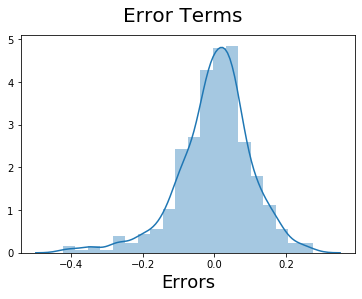

In [2579]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred_forward), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Error terms have a nice normal shape and are centered around 0.

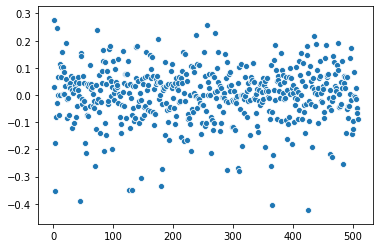

In [2580]:
res = (y_train - y_train_pred_forward)
c = [i for i in range(1,510,1)]
sns.scatterplot(c,res)
plt.show()

Error terms are independent. 

## Predictions on test set and Model evaluation

In [2592]:
X_test.describe()

,const,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Dec,mnth_Jul,mnth_Mar,mnth_May,mnth_Nov,mnth_Sep,holiday_yes,weekday_Monday,weekday_Tuesday,weathersit_Light snow,weathersit_Mist
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.536706,0.492669,0.396337,0.255708,0.251142,0.547945,0.091324,0.082192,0.100457,0.095890,0.073059,0.082192,0.022831,0.114155,0.196347,0.018265,0.333333
std,0.0,0.225910,0.196144,0.170032,0.437258,0.434663,0.498836,0.288730,0.275286,0.301297,0.295115,0.260830,0.275286,0.149707,0.318728,0.398144,0.134214,0.472484
min,1.0,0.046591,-0.031100,0.057872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.325507,0.342703,0.282636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.530654,0.495814,0.369439,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.741964,0.650419,0.499690,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.0,0.960541,0.997010,0.845667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2593]:
X_test_forward = X_test[["const",'temp', 'yr_2019', 'hum', 'windspeed', 'weathersit_Light snow',
       'season_spring', 'season_winter', 'mnth_May']]


In [2594]:
y_test_pred_forward = model_3.predict(X_test_forward)

In [2595]:
r2_score(y_test, y_test_pred_forward)

0.8393147519806841

In [2596]:
r2_score(y_train,y_train_pred_forward)

0.7982303718749839

In [2598]:
np.sqrt(mean_squared_error(y_test,y_test_pred_forward))

0.08786759611076433

Our forward selection method, has an R2 score of 79.82% on our train dataset. And improves by 4% to 83.93% while making predictions on the test set. 
So this means our model with 8 features has generalised very well. 

In [2587]:
model_3.params

const                    0.334792
temp                     0.460886
yr_2019                  0.226476
hum                     -0.201712
windspeed               -0.139064
weathersit_Light snow   -0.162915
season_spring           -0.126555
season_winter            0.060391
mnth_May                 0.038524
dtype: float64

## Final model interpretations and business insights

So we have with us two models: 

#### Simple model - with 8 features - R2 of 83.93% on test set
#### Complex model - with 17 features - R2 of 85.89% on test set

This presents itself as a tradeoff. If our aim is to maximise R2 then we could go with the complex model. If our aim is to have as few features as possible with a decent predictive power, then we could go with the simple model. 


Given the context of the case study which requires the best R2, we will go with the complex model as our final model that used Minmax scaling with 17 params as it had the highest R2. Let's interpret their coefficents and gather some business insights. 

In [2588]:
round(smlr.params,2)

const                    0.35
temp                     0.45
hum                     -0.17
windspeed               -0.14
season_spring           -0.13
season_winter            0.09
yr_2019                  0.23
mnth_Dec                -0.04
mnth_Jul                -0.06
mnth_Mar                 0.05
mnth_May                 0.04
mnth_Nov                -0.06
mnth_Sep                 0.07
holiday_yes             -0.09
weekday_Monday          -0.03
weekday_Tuesday         -0.03
weathersit_Light snow   -0.20
weathersit_Mist         -0.05
dtype: float64

The management of Boom bikes should be told that the factors that have a significant impact on the demand of their shared bikes are: 

1. Temperature, if the temperature is increased by 1 degree or F, it will increase the demand of their bikes by 45%. 
Thus, during hotter days they should have more bikes at their docking locations so as to meet the excess demand. Also, boombikes should consider operating in more hotter locations around US. 

2. Yr_2019 has seen a significant boost in demand compared to 2018. This shows that the company is growing to be popular and if not for the pandemic, they would have seen a growing trend in their demand in 2020 as well. 

3. If Humidity or windspeed increases by 1 unit, the demand of bikes will fall by 17% and 14% respectively. Hence, this business is very weather sensitive. The company should focus more on operating in sunny, less humid and less windy areas of US that have a short winter period. 

4. Spring affects demand negatively and winter affects demand positvely. This seems intuitvely misleading as winter days are usually cold and the temperature is low. Given temperature is positively correlated with our demand, a lower temperature should reduce the demand of the bikes. Hence, this error may be due to the wrong mapping of the seasons to months in the given dataset. 

5. Months dec, july and november have a negative impact on demand. 

6. Months march, may and september have a positive effect on demand. 

7. On holidays, the demand drops by 9%, given all other factors remain unchanged. 

8. Mondays and tuedays see a drop in demand for bikes. 

9. If there is light snow, then the demand for the bikes plunges by 20%, compared to misty weather where demand drops 
only by 5%. 

